参考文献　https://qiita.com/chicken_data_analyst/items/76cbbc403293e1f4a53c

In [25]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.font_manager as fm
import matplotlib.font_manager as font_manager
from matplotlib.markers import TICKLEFT, TICKRIGHT, TICKUP, TICKDOWN, CARETLEFT, CARETRIGHT, CARETUP, CARETDOWN
from mpl_toolkits.mplot3d import axes3d, Axes3D
import sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.covariance import GraphicalLassoCV, GraphicalLasso
import scipy
import functools
import seaborn as sns
import glob
import datetime as dt
import gc
import sys
import tqdm as tq
from tqdm import tqdm
import time
import pickle
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import collections
# jpn_fonts=list(np.sort([ttf for ttf in fm.findSystemFonts() if 'ipaexg' in ttf or 'msgothic' in ttf or 'japan' in ttf or 'ipafont' in ttf]))
# jpn_font=jpn_fonts[0]
# prop = font_manager.FontProperties(fname=jpn_font)
# print(jpn_font)
# sns.set()

# import warnings
# warnings.simplefilter('ignore')

In [26]:
!pip install lingam

In [27]:
import graphviz
import lingam
from lingam.utils import make_dot
from lingam.utils import print_causal_directions, print_dagc

In [28]:
df_all = pd.read_csv('all_drop_exp_re.csv',encoding='shift-jis')
df_all


,Unnamed: 0,d1,d2,d3,d4,d5,w1,w2,w3,w4,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,0,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,21.00362,...,29,21,10,6,3,1.75,3.10,3.55,3.60,3.55
1,2,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,20.50303,...,18,16,18,15,4,2.40,2.40,2.70,2.60,3.50
2,3,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,17.58007,...,28,16,17,11,4,2.15,3.40,3.85,3.30,3.55
3,4,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,25.27235,...,23,24,24,23,5,1.80,4.05,4.20,3.80,4.70
4,5,4.9113,1.4880,3.0357,4.70687,6.26354,26.34567,23.30003,23.58674,17.89807,...,16,11,22,22,3,2.50,3.45,3.20,2.65,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,796,7.0463,-1.1722,4.3281,2.71297,7.12817,20.17931,10.61594,10.69781,8.36414,...,26,31,21,13,5,2.25,2.50,3.80,2.30,3.35
636,797,8.5748,-1.1702,4.7669,4.87733,7.84963,27.71802,19.01448,16.56406,16.81861,...,30,14,14,10,5,2.50,3.10,3.90,3.20,3.80
637,798,10.2154,-1.1652,5.1767,2.77794,4.07748,21.64954,14.42384,14.39132,14.72991,...,36,13,21,29,2,2.95,2.90,2.80,2.90,2.85
638,802,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,18.43385,...,28,26,17,6,4,2.20,4.25,4.20,3.90,4.30


In [29]:
df_all = df_all[['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s']]

In [30]:
df_all.describe()

,d1,d2,d3,d4,d5,w1,w2,w3,w4,w5,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,6.219847,0.460025,4.463986,3.686702,5.692682,27.475119,18.710123,16.069171,16.605379,11.645567,...,24.050000,21.290625,17.365625,13.273438,3.925000,2.439062,3.358516,3.553125,3.327422,3.639687
std,2.228616,1.504184,1.618577,1.079367,1.234064,6.548395,4.449897,4.100636,4.092694,3.209391,...,6.488029,5.668178,5.455245,4.977752,0.948106,0.555367,0.532314,0.532619,0.565742,0.518563
min,-0.753800,-2.851000,0.844100,1.774170,2.625490,8.466880,5.481590,5.487490,5.486980,3.903220,...,7.000000,4.000000,0.000000,0.000000,2.000000,1.300000,1.600000,1.700000,1.200000,1.450000
25%,4.557875,-0.644450,3.321675,2.850433,4.870975,22.963640,15.761030,13.184157,13.723558,9.265895,...,19.750000,18.000000,14.000000,10.000000,3.000000,2.000000,3.000000,3.150000,2.950000,3.300000
50%,6.211050,0.203800,4.288700,3.512340,5.591330,27.191665,18.252545,16.006360,16.458400,11.701745,...,24.000000,21.000000,17.000000,13.000000,4.000000,2.400000,3.350000,3.550000,3.300000,3.600000
75%,7.762150,1.417725,5.554575,4.263863,6.418975,31.567892,21.870438,18.609605,19.072785,13.918173,...,29.000000,25.000000,21.000000,17.000000,5.000000,2.900000,3.750000,3.950000,3.750000,4.050000
max,11.550000,6.520000,8.202800,7.389040,9.488850,43.207130,28.747800,27.549800,27.586480,19.516100,...,47.000000,42.000000,34.000000,33.000000,5.000000,4.350000,4.600000,4.800000,4.600000,4.750000


In [31]:
new_column_names = {'d1': '安全運転特性', 'd2': '不安定な運転特性','d3': '心配性特性', 'd4': 'ステイタス特性', 'd5': '事前準備特性','w1': '道路状況把握', 'w2': '心身状況','w3': '運転ペース阻害', 'w4': '車環境','w5': '視野環境','c1': '写真タイプ', 'c2': '三次元映像タイプ','c3': '言語映像タイプ', 'c4': '言語抽象タイプ','c5': '聴覚言語タイプ', 'c6': '聴覚&音タイプ','p': '行動変容フェーズ', 'none_s': '提示なし','image_s': '画像のみ', 'announce_s': '音声のみ','image_sound_s': '画像+報知音', 'image_announce_s': '画像+音声'}

In [32]:
df_all = df_all.rename(columns=new_column_names)

In [33]:
colsname = df_all.columns
colsname

Index(['安全運転特性', '不安定な運転特性', '心配性特性', 'ステイタス特性', '事前準備特性', '道路状況把握', '心身状況',
       '運転ペース阻害', '車環境', '視野環境', '写真タイプ', '三次元映像タイプ', '言語映像タイプ', '言語抽象タイプ',
       '聴覚言語タイプ', '聴覚&音タイプ', '行動変容フェーズ', '提示なし', '画像のみ', '音声のみ', '画像+報知音',
       '画像+音声'],
      dtype='object')

In [34]:
# df_sampleを標準化
df_std = df_all.copy()
ss = sklearn.preprocessing.StandardScaler()
df_std = pd.DataFrame(ss.fit_transform(df_std), columns=colsname)
display(df_std)

,安全運転特性,不安定な運転特性,心配性特性,ステイタス特性,事前準備特性,道路状況把握,心身状況,運転ペース阻害,車環境,視野環境,...,言語映像タイプ,言語抽象タイプ,聴覚言語タイプ,聴覚&音タイプ,行動変容フェーズ,提示なし,画像のみ,音声のみ,画像+報知音,画像+音声
0,0.033164,0.984542,1.420761,-0.562605,0.023419,1.450336,1.612072,1.276102,1.075497,1.009280,...,0.763540,-0.051313,-1.351248,-1.462332,-0.976393,-1.241704,-0.486025,-0.005872,0.482183,-0.173089
1,0.437094,1.093391,0.311884,1.834840,2.183642,0.377982,0.489195,0.860917,0.953089,1.007104,...,-0.933216,-0.934121,0.116378,0.347127,0.079167,-0.070391,-1.802066,-1.603006,-1.286788,-0.269585
2,0.753636,-0.955234,-0.110174,0.142220,-0.661140,-0.091379,0.050780,-0.014912,0.238340,0.007715,...,0.609290,-0.934121,-0.067075,-0.457077,0.079167,-0.520896,0.077993,0.557823,-0.048509,-0.173089
3,1.574293,-0.282849,1.671918,0.204287,0.494087,2.404302,2.204344,2.102478,2.119325,2.451110,...,-0.161963,0.478371,1.217097,1.955536,1.134727,-1.151603,1.300031,1.215466,0.835977,2.046312
4,-0.587616,0.683945,-0.883123,0.945893,0.462946,-0.172612,1.032271,1.834703,0.316100,-0.546826,...,-1.241717,-1.816929,0.850191,1.754485,-0.976393,0.109811,0.171996,-0.663515,-1.198340,0.116398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.371127,-1.085972,-0.084020,-0.902838,1.164130,-1.115008,-1.820382,-1.310909,-2.015221,-0.297222,...,0.300789,1.714302,0.666738,-0.054975,1.134727,-0.340694,-1.614060,0.463874,-1.817480,-0.559072
636,1.057515,-1.084641,0.187294,1.103943,1.749209,0.037122,0.068450,0.120780,0.052141,0.379469,...,0.917791,-1.287244,-0.617435,-0.658128,1.134727,0.109811,-0.486025,0.651772,-0.225406,0.309389
637,1.794243,-1.081315,0.440678,-0.842599,-1.309871,-0.890315,-0.963985,-0.409489,-0.458606,-0.173523,...,1.843294,-1.463806,0.666738,3.161842,-2.031952,0.920719,-0.862036,-1.415108,-0.756097,-1.524029
638,1.101972,-0.586574,-1.876500,0.545494,-0.162048,0.548164,0.627990,0.813607,0.447114,1.037498,...,0.609290,0.831495,-0.067075,-1.462332,0.079167,-0.430795,1.676043,1.215466,1.012874,1.274347


In [35]:
%%time
# DirectLiNGAM
print(time.ctime())
model = lingam.DirectLiNGAM()
model.fit(df_std)
print(time.ctime())

# DAGを保存するなら実行
save_pickle = 'pickles'
os.makedirs(save_pickle, exist_ok=True)
#with open(save_pickle+'/model_DLingam.pickle', mode='wb') as f:
#    pickle.dump(model, f)

Fri Aug 16 09:15:39 2024
Fri Aug 16 09:15:39 2024
CPU times: user 746 ms, sys: 45.6 ms, total: 792 ms
Wall time: 670 ms


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

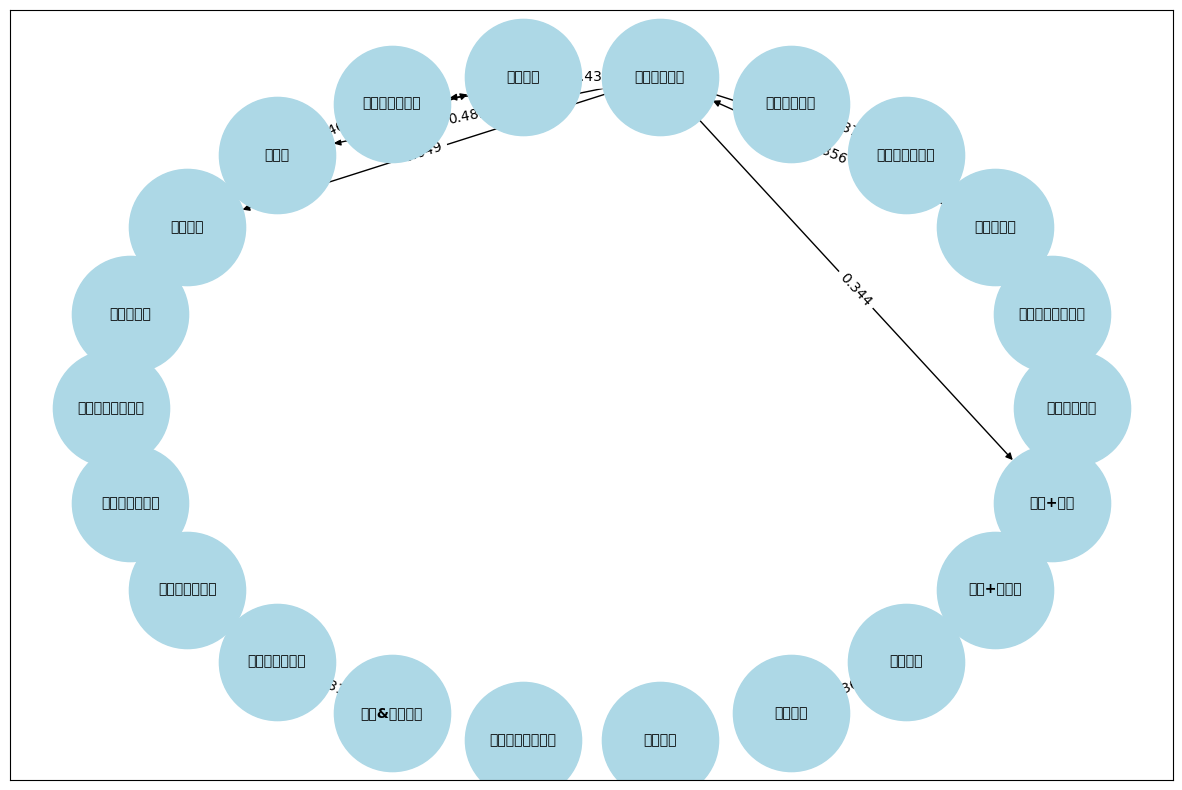

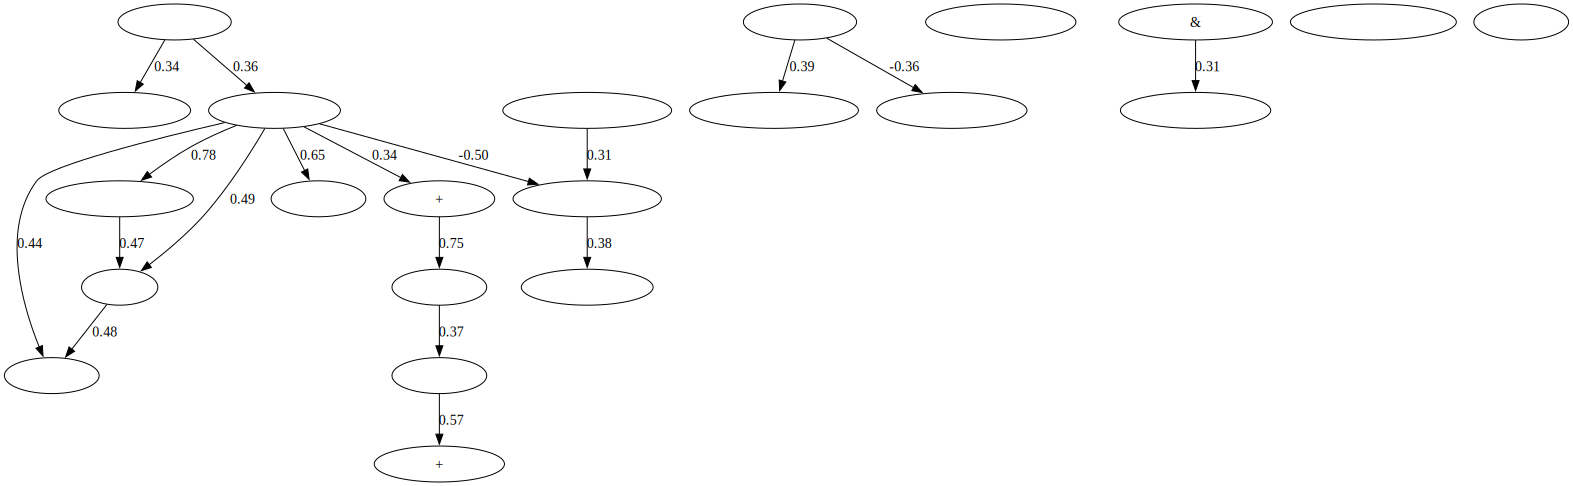

In [36]:
# 隣接行列の取得
adjacency_matrix = model.adjacency_matrix_

# フィルタリング
threshold = 0.30
filtered_adjacency_matrix = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)

# 有向グラフの作成
G = nx.from_numpy_array(filtered_adjacency_matrix.T, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(colsname)))

# エッジラベルの作成
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True) if np.abs(d['weight']) > threshold}

# グラフの描画
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)
plt.show()

# make_dotを用いた可視化
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

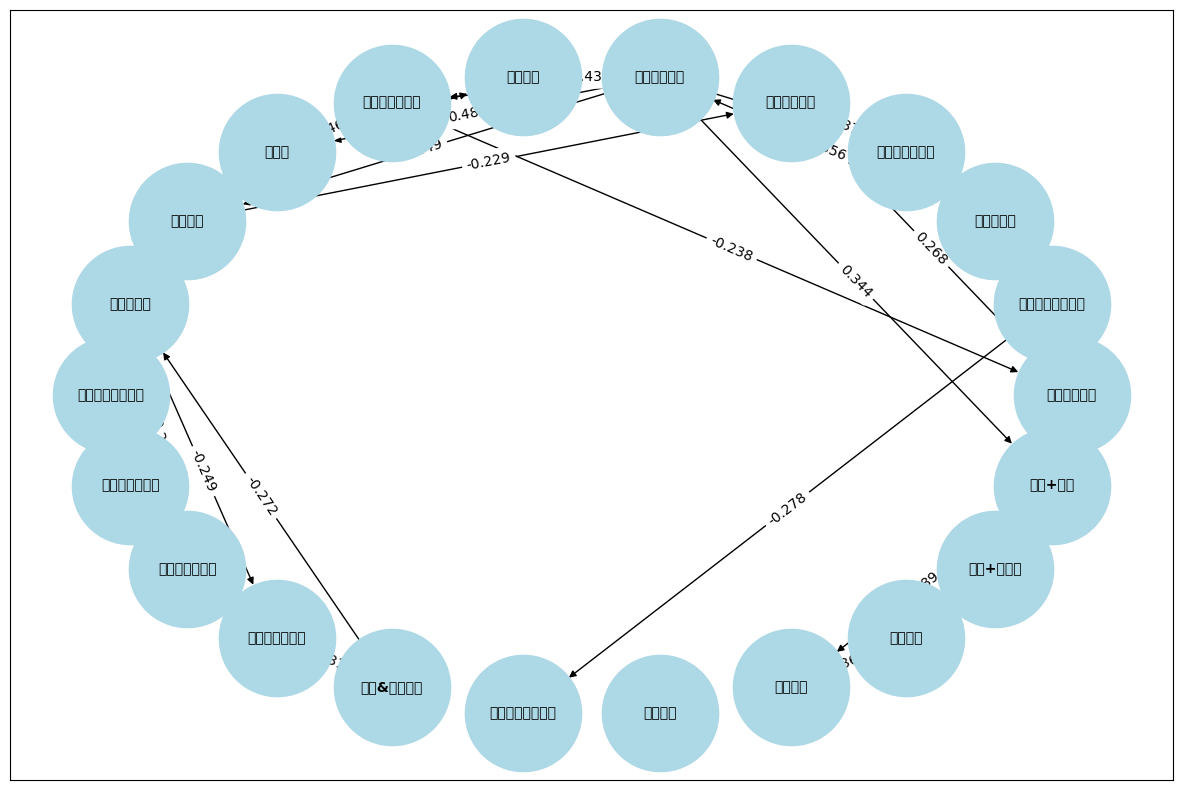

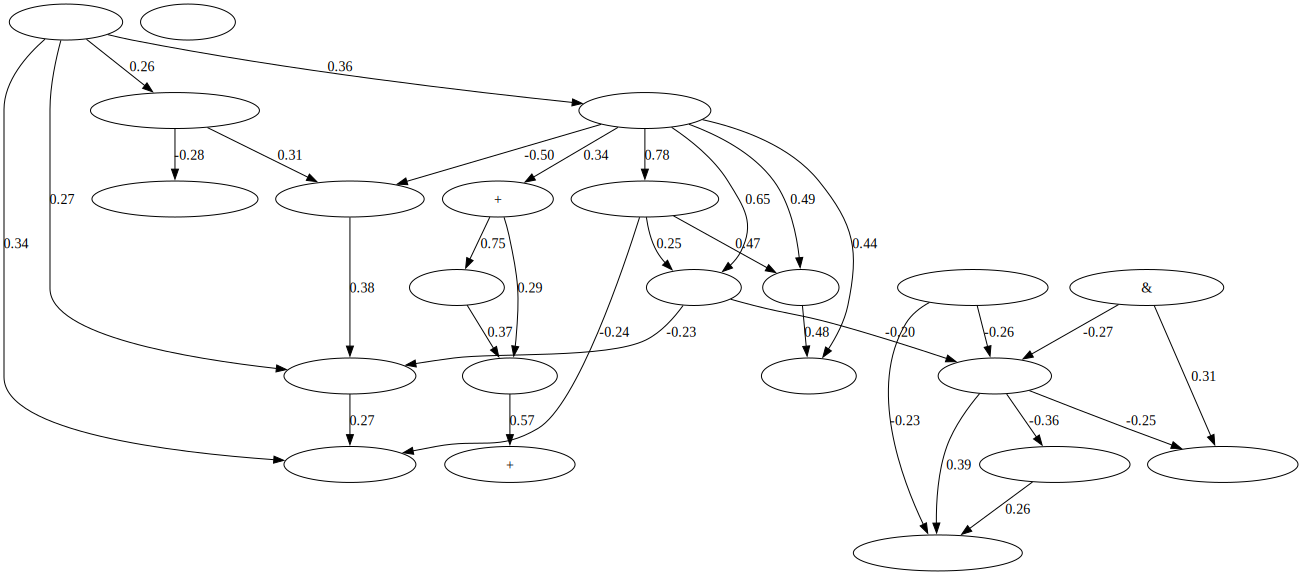

In [37]:
# 隣接行列の取得
adjacency_matrix = model.adjacency_matrix_

# フィルタリング
threshold = 0.20
filtered_adjacency_matrix = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)

# 有向グラフの作成
G = nx.from_numpy_array(filtered_adjacency_matrix.T, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(colsname)))

# エッジラベルの作成
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True) if np.abs(d['weight']) > threshold}

# グラフの描画
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)
plt.show()

# make_dotを用いた可視化
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_45422/4235046914.py:9: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  plt.savefig("graph0627.png")
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_45422/4235046914.py:9: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  plt.savefig("graph0627.png")
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_45422/4235046914.py:9: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  plt.savefig("graph0627.png")
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_45422/4235046914.py:9: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  plt.savefig("graph0627.png")
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_45422/4235046914.py:9: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  plt.savefig("graph0627.png")
/var/folde

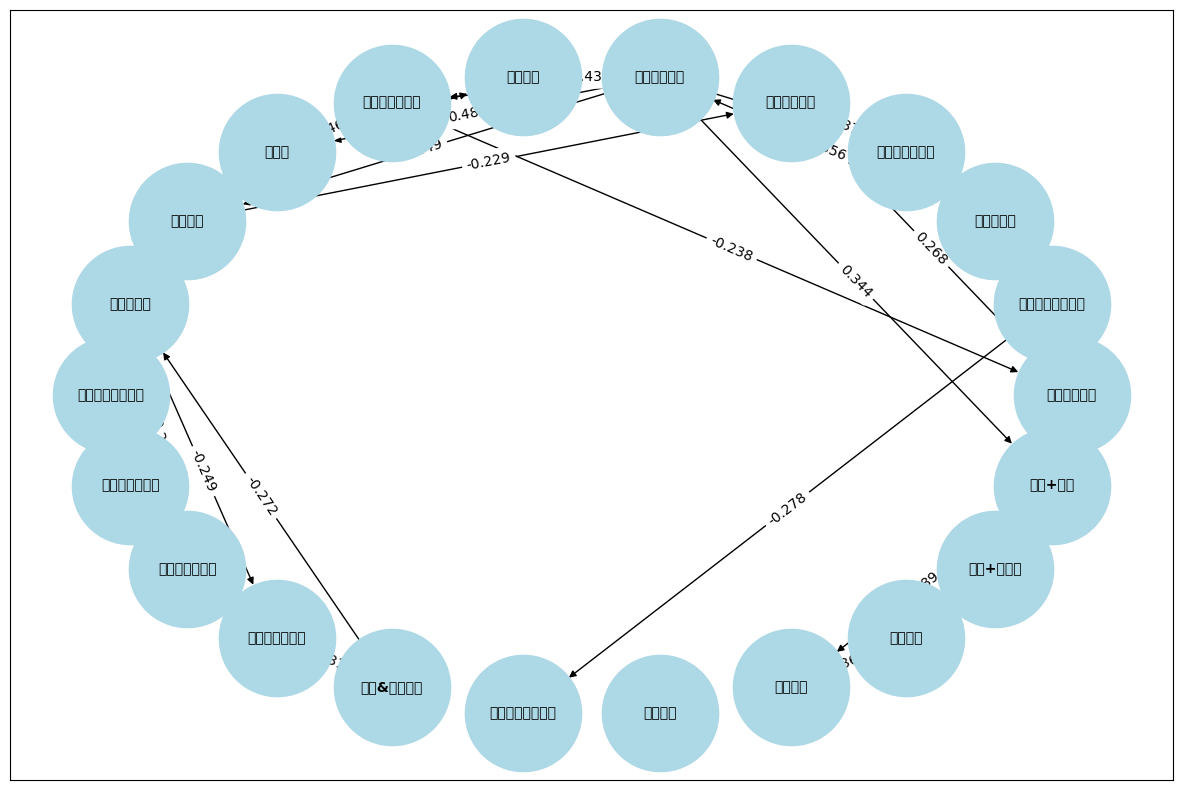

In [38]:
# グラフの描画と保存
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)

# 画像を保存
plt.savefig("graph0627.png")
plt.show()

In [39]:
from graphviz import Source

# make_dotを用いた可視化と保存
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
dot = make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

# dot形式で保存
dot.save('graph0627.dot')

# PNG形式で保存
dot.render('graph0627', format='png')

'graph0627.png'

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

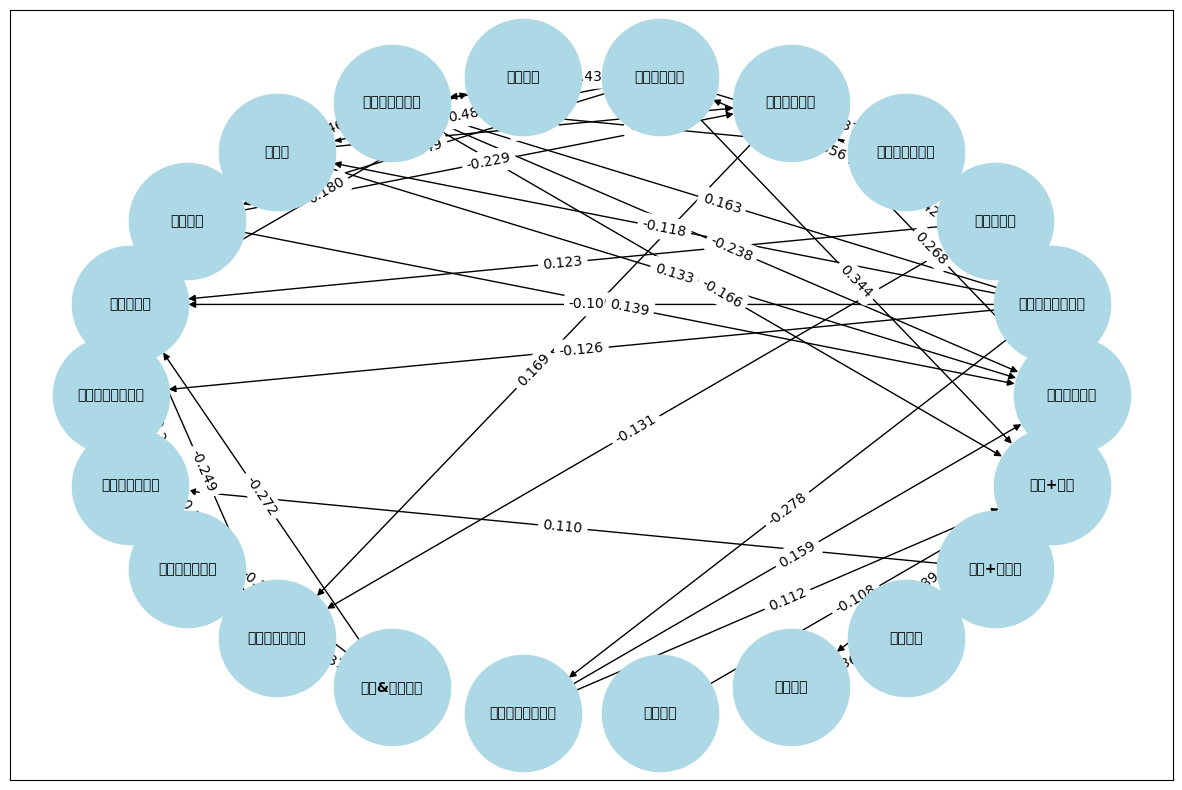

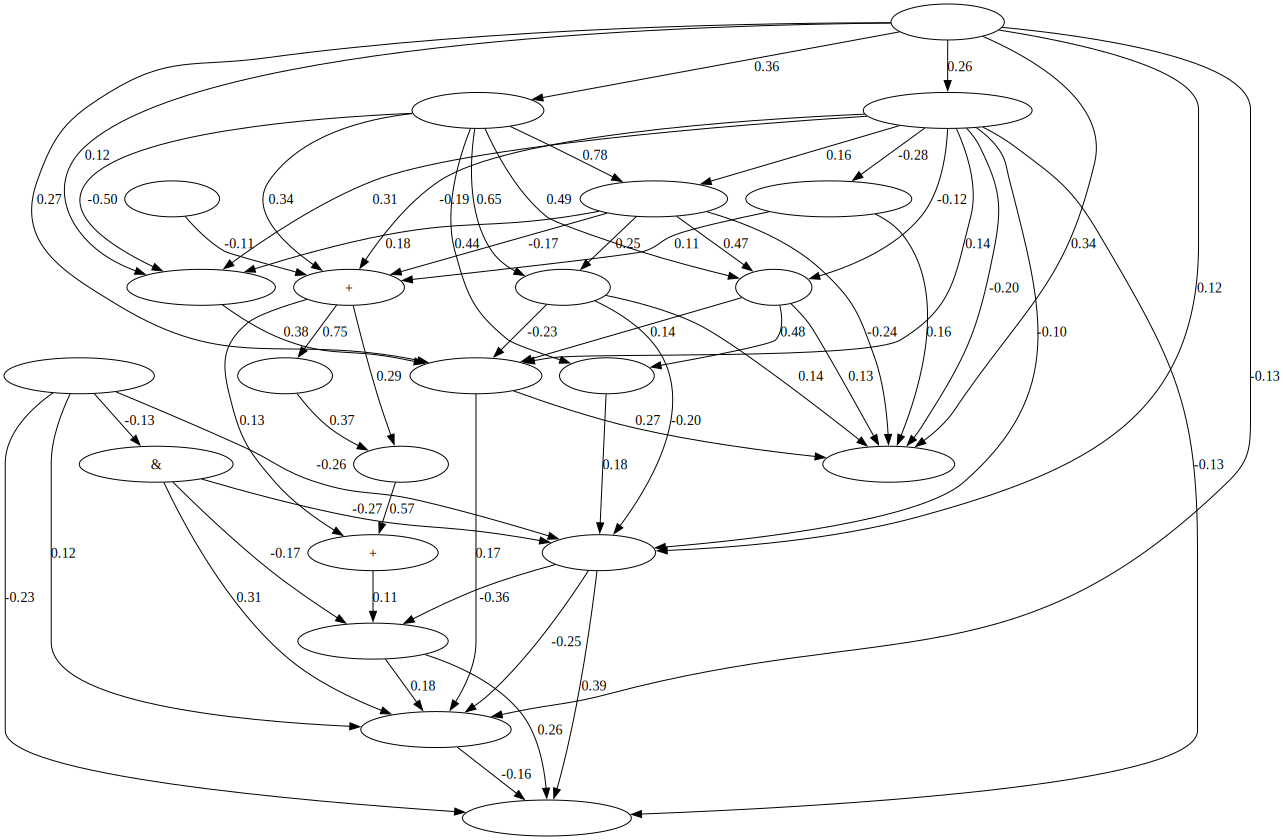

In [40]:
# 隣接行列の取得
adjacency_matrix = model.adjacency_matrix_

# フィルタリング
threshold = 0.1
filtered_adjacency_matrix = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)

# 有向グラフの作成
G = nx.from_numpy_array(filtered_adjacency_matrix.T, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(colsname)))

# エッジラベルの作成
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True) if np.abs(d['weight']) > threshold}

# グラフの描画
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)
plt.show()

# make_dotを用いた可視化
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

<Figure size 1500x1000 with 0 Axes>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

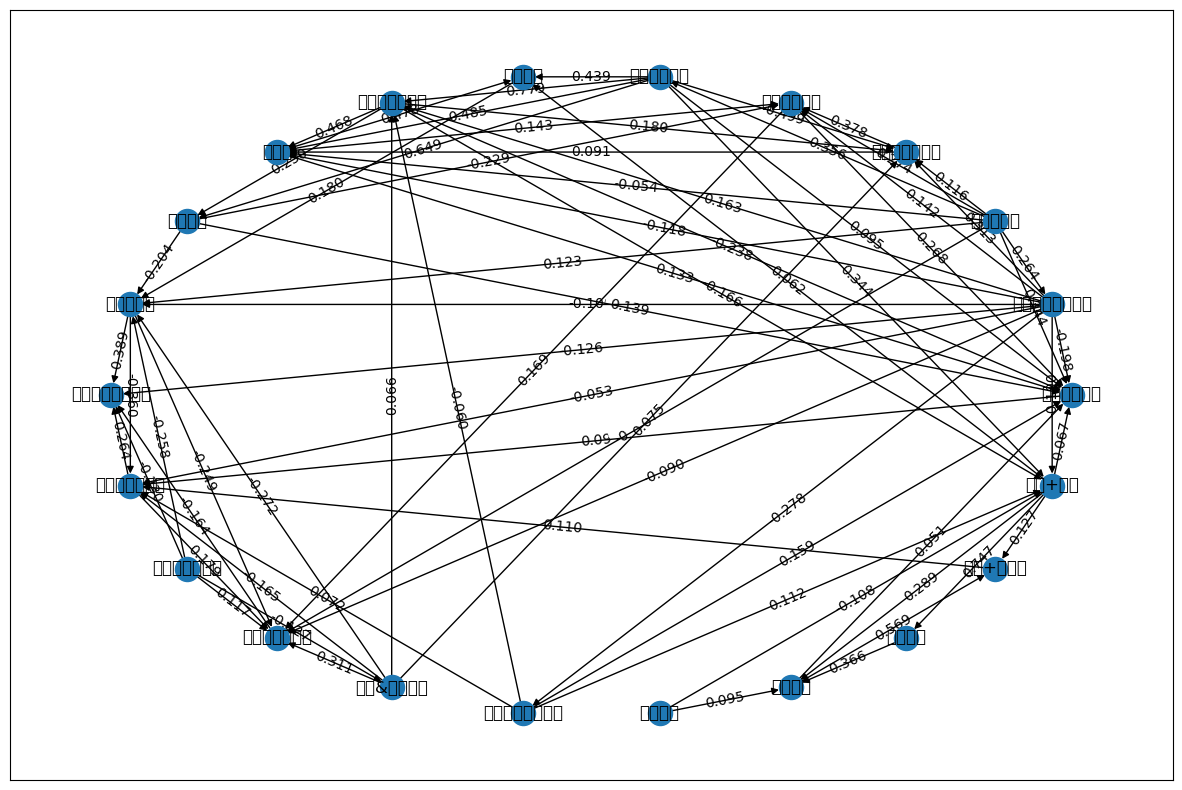

In [41]:
# 想定される因果
G = nx.DiGraph()  # 有向グラフ (Directed Graph)
# 頂点の追加
#G.add_node('Air temperature [K]')                
G.add_nodes_from(colsname)

# 隣接行列を有向グラフで可視化(networkx使用)
plt.figure(figsize=(15,10))
pos = nx.circular_layout(G, scale=1, center=None, dim=2)  # ここのポジションをこの先のplotでも使用する
# #pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
# nx.draw_networkx(G, pos)
# plt.grid(False)
# plt.show()
adjacency_ = pd.DataFrame(model.adjacency_matrix_, columns=colsname, index=colsname)
G=nx.from_pandas_adjacency(adjacency_.T, create_using=nx.DiGraph)  # 列が原因、行が結果なのでnetworkxでは転置の必要がある
plt.figure(figsize=(15,10))
#pos = nx.bipartite_layout(G, colsname[:5])
#pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
edge_labels = dict([((u,v,), f"{d['weight']:.3f}") for u,v,d in G.edges(data=True)])#nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw_networkx(G, pos)
plt.grid(False)
plt.show()

[13, 15, 17, 2, 5, 1, 16, 7, 3, 8, 21, 19, 18, 20, 6, 9, 10, 4, 0, 12, 14, 11]
['言語抽象タイプ' '聴覚&音タイプ' '提示なし' '心配性特性' '道路状況把握' '不安定な運転特性' '行動変容フェーズ'
 '運転ペース阻害' 'ステイタス特性' '車環境' '画像+音声' '音声のみ' '画像のみ' '画像+報知音' '心身状況' '視野環境'
 '写真タイプ' '事前準備特性' '安全運転特性' '言語映像タイプ' '聴覚言語タイプ' '三次元映像タイプ']


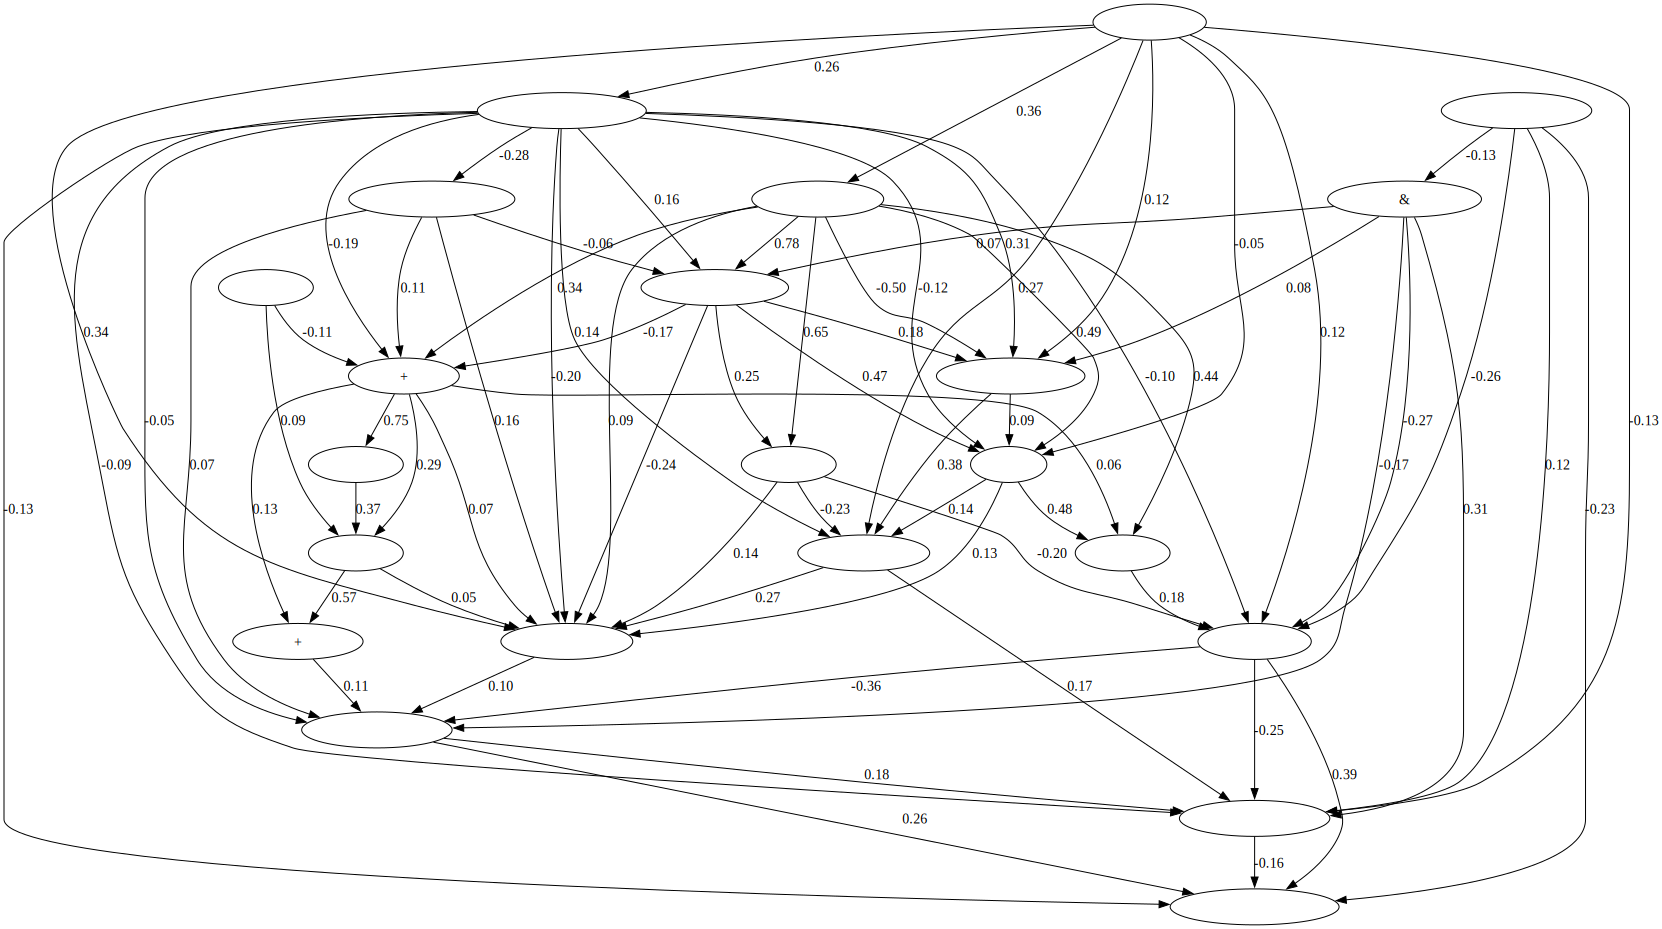

In [42]:
# 隣接行列を有向グラフで可視化(make_dot使用)
print(model.causal_order_)
print(np.array(colsname)[model.causal_order_])
#print(model.adjacency_matrix_)
make_dot(model.adjacency_matrix_, labels=list(colsname))

ブートストラップ法　参考URL https://qiita.com/ts5129nk/items/03d6a73c36ecedad2535

In [43]:
# #ブートストラップ実行
# result = model.bootstrap(x, n_sampling=100)
# #結果の表示
# causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)

# df_b = pd.DataFrame(causal_effects)
# df_b['from'] = df_b['from'].apply(lambda x : colsname[x])
# df_b['to'] = df_b['to'].apply(lambda x : colsname[x])
# #効果の降順でソート
# df_b=df_b.sort_values('effect', ascending=False)
# df_b

In [44]:
%%time
# DirectLiNGAM bootstrap
print(time.ctime())
n_sampling = 1000
model = lingam.DirectLiNGAM()
result = model.bootstrap(df_std, n_sampling=n_sampling)
print(time.ctime())

# DAGを保存するなら実行
save_pickle = 'pickles'
os.makedirs(save_pickle, exist_ok=True)
#with open(save_pickle+'/model_DLingam_bootstrap.pickle', mode='wb') as f:
#    pickle.dump(model, f)

Fri Aug 16 09:15:44 2024
Fri Aug 16 09:27:12 2024
CPU times: user 34min 19s, sys: 7min 28s, total: 41min 48s
Wall time: 11min 28s


[13, 7, 12, 15, 14, 3, 17, 16, 20, 1, 11, 10, 4, 0, 6, 8, 9, 5, 2, 21, 19, 18]
['言語抽象タイプ' '運転ペース阻害' '言語映像タイプ' '聴覚&音タイプ' '聴覚言語タイプ' 'ステイタス特性' '提示なし'
 '行動変容フェーズ' '画像+報知音' '不安定な運転特性' '三次元映像タイプ' '写真タイプ' '事前準備特性' '安全運転特性'
 '心身状況' '車環境' '視野環境' '道路状況把握' '心配性特性' '画像+音声' '音声のみ' '画像のみ']


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

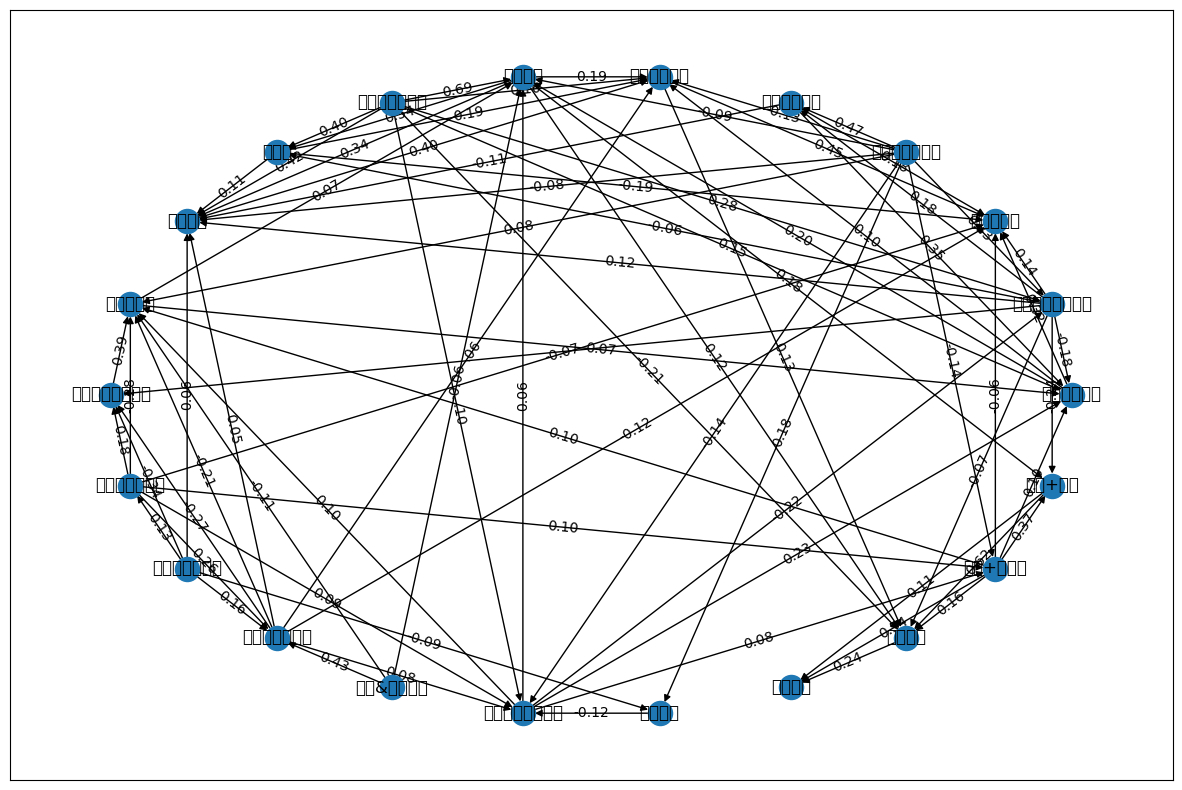

In [45]:
# 隣接行列を有向グラフで可視化(networkx使用)
print(model.causal_order_)
print(np.array(colsname)[model.causal_order_])
#print(model.adjacency_matrix_)

adjacency_ = pd.DataFrame(model.adjacency_matrix_, columns=colsname, index=colsname)
G=nx.from_pandas_adjacency(adjacency_.T, create_using=nx.DiGraph)  # 列が原因、行が結果なのでnetworkxでは転置の必要がある
plt.figure(figsize=(15,10))
#pos = nx.bipartite_layout(G, colsname[:5])
#pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
edge_labels = edge_labels = dict([((u,v,), f"{d['weight']:.2f}") for u,v,d in G.edges(data=True)])#nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw_networkx(G, pos)
plt.grid(False)
plt.show()

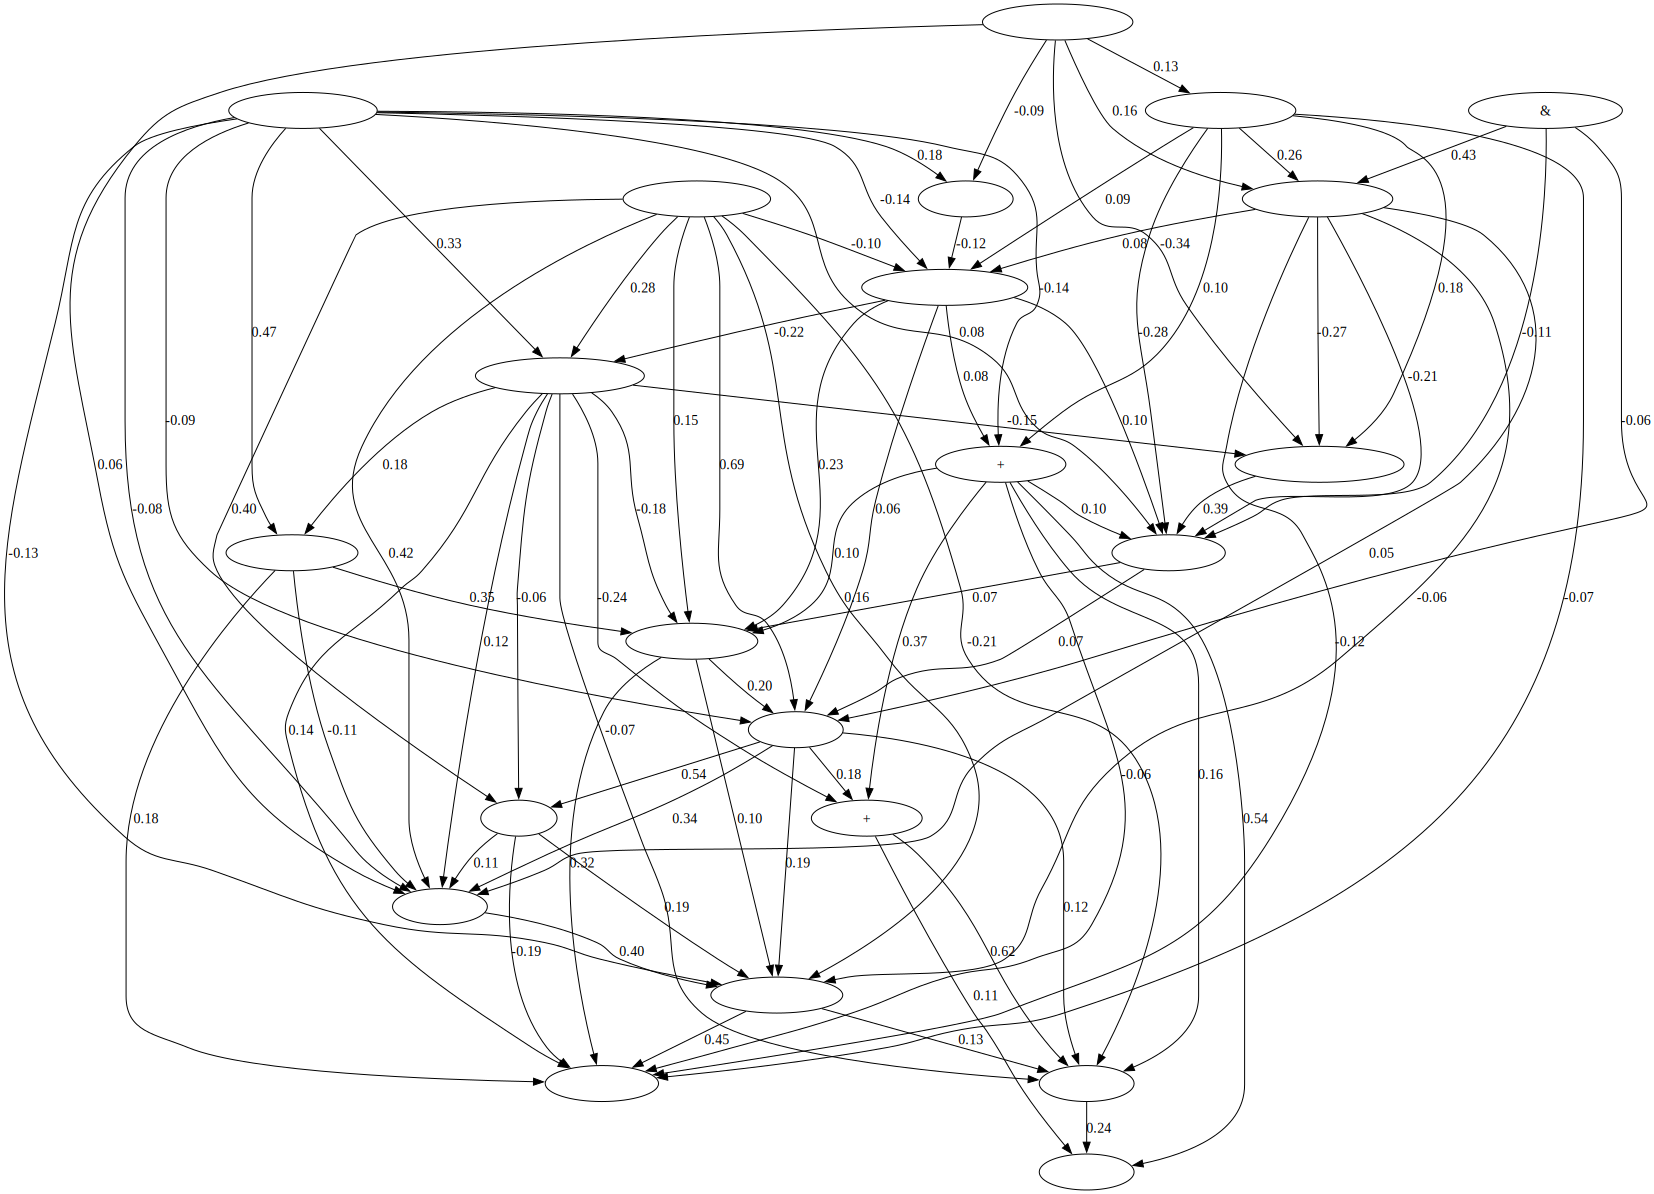

In [46]:
# 隣接行列を有向グラフで可視化(make_dot使用)
make_dot(model.adjacency_matrix_, labels=list(colsname))

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

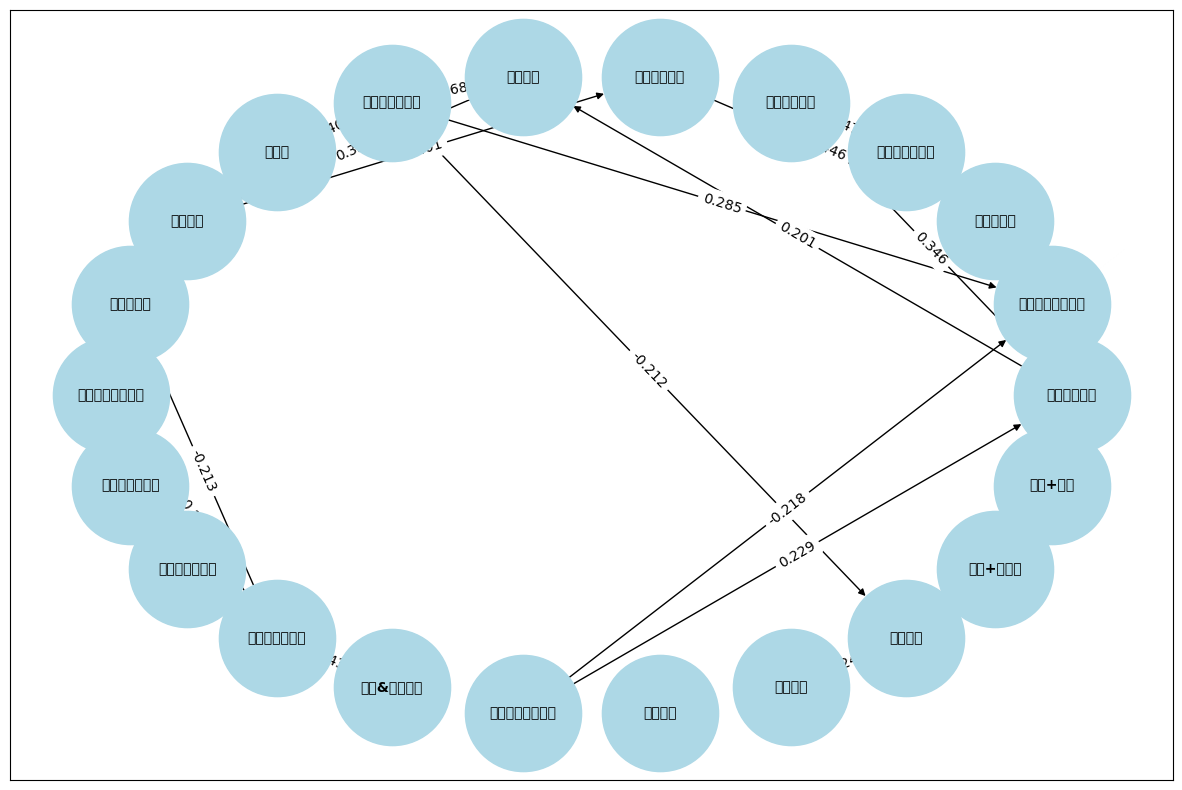

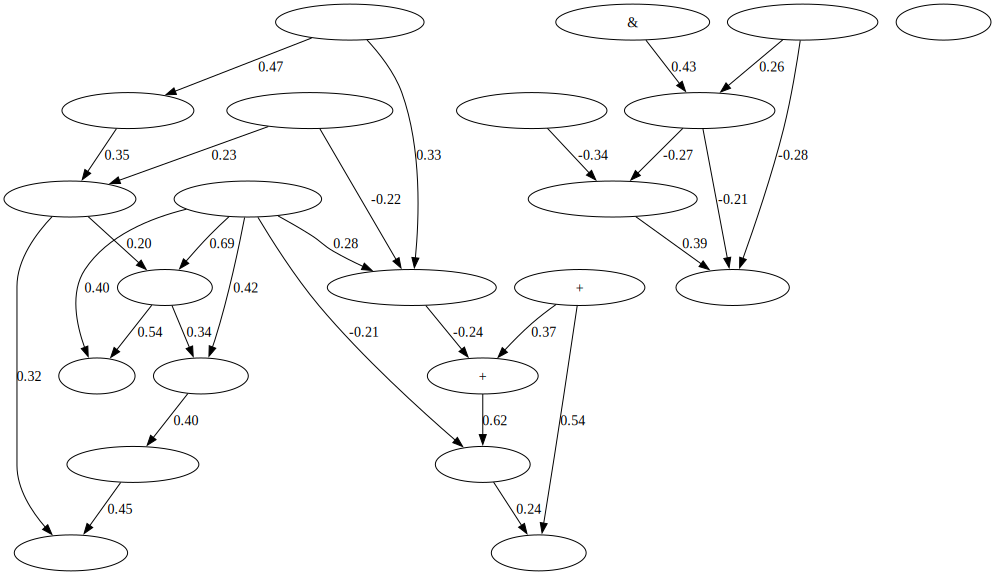

In [47]:
# 隣接行列の取得
adjacency_matrix = model.adjacency_matrix_

# フィルタリング
threshold = 0.20
filtered_adjacency_matrix = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)

# 有向グラフの作成
G = nx.from_numpy_array(filtered_adjacency_matrix.T, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(colsname)))

# エッジラベルの作成
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True) if np.abs(d['weight']) > threshold}

# グラフの描画
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)
plt.show()

# make_dotを用いた可視化
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

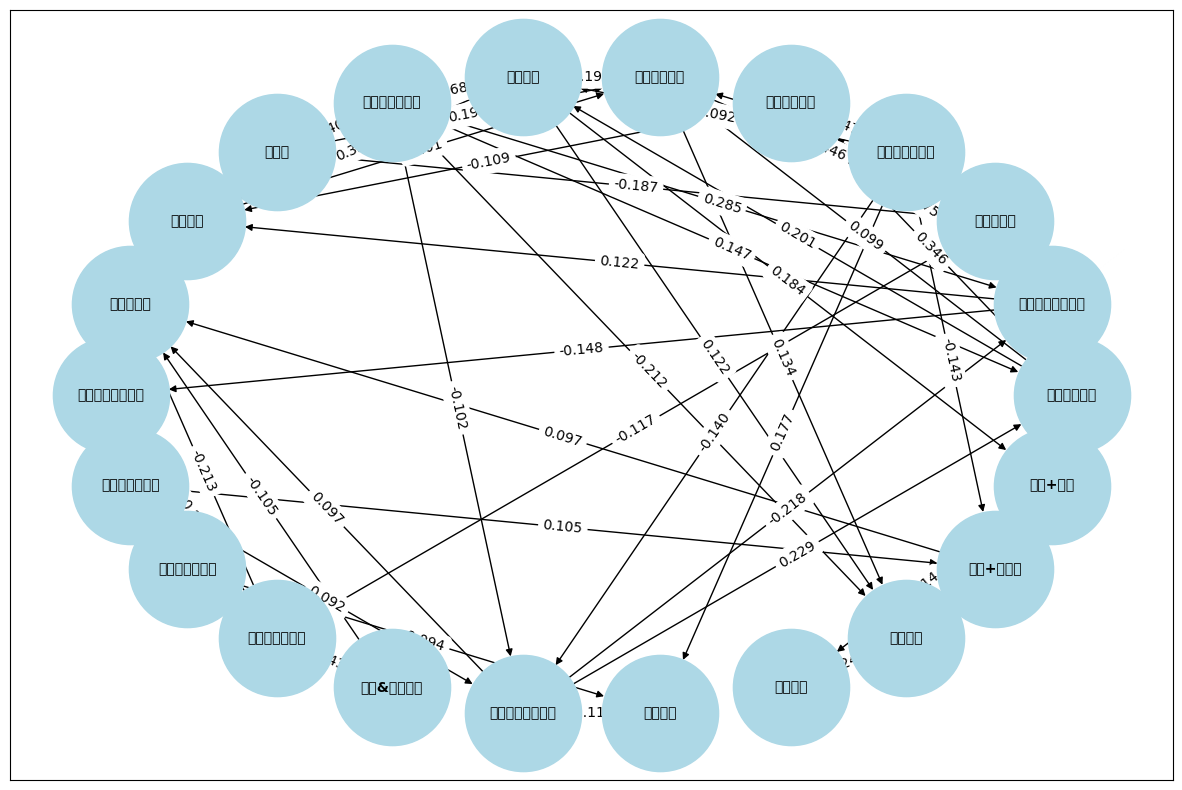

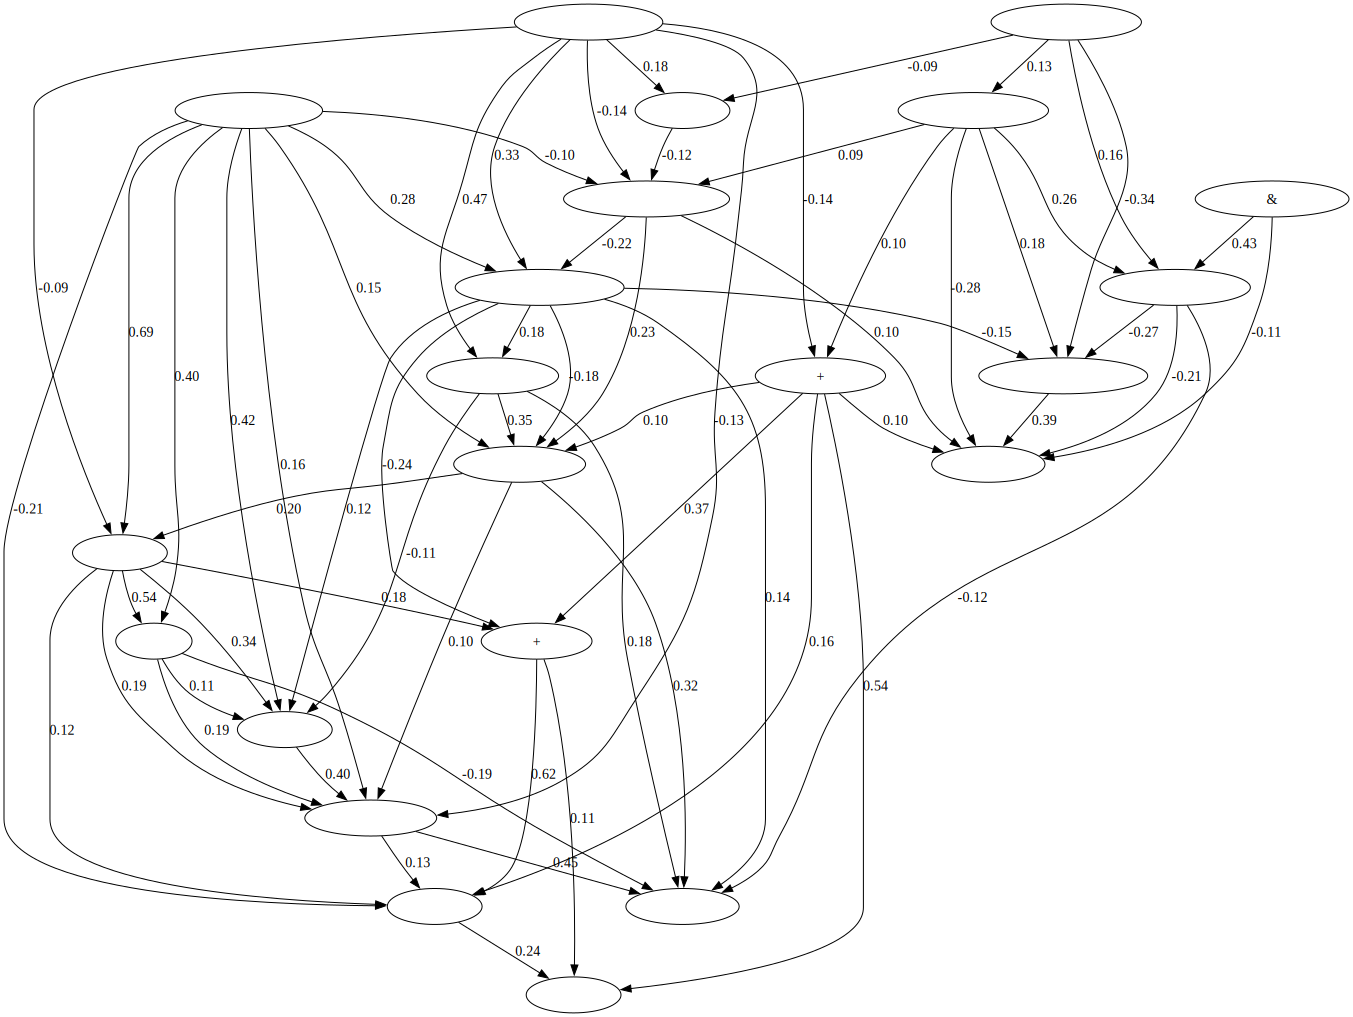

In [48]:
# 隣接行列の取得
adjacency_matrix = model.adjacency_matrix_

# フィルタリング
threshold = 0.09
filtered_adjacency_matrix = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)

# 有向グラフの作成
G = nx.from_numpy_array(filtered_adjacency_matrix.T, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(colsname)))

# エッジラベルの作成
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True) if np.abs(d['weight']) > threshold}

# グラフの描画
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)
plt.show()

# make_dotを用いた可視化
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

In [49]:
%%time
# DirectLiNGAM bootstrap result
print(time.ctime())
dagc = result.get_directed_acyclic_graph_counts(n_dags=5, min_causal_effect=0.1, split_by_causal_effect_sign=True)
print_dagc(dagc, n_sampling)
print(time.ctime())

Fri Aug 16 09:27:14 2024
DAG[0]: 0.1%
	x0 <--- x1 (b<0)
	x0 <--- x6 (b>0)
	x0 <--- x9 (b>0)
	x0 <--- x10 (b>0)
	x0 <--- x15 (b>0)
	x0 <--- x16 (b>0)
	x1 <--- x6 (b<0)
	x1 <--- x7 (b>0)
	x1 <--- x16 (b<0)
	x1 <--- x17 (b>0)
	x2 <--- x0 (b>0)
	x2 <--- x1 (b>0)
	x2 <--- x4 (b>0)
	x2 <--- x5 (b>0)
	x2 <--- x11 (b>0)
	x2 <--- x14 (b<0)
	x3 <--- x0 (b>0)
	x3 <--- x1 (b>0)
	x3 <--- x5 (b<0)
	x3 <--- x15 (b>0)
	x3 <--- x21 (b<0)
	x4 <--- x0 (b>0)
	x4 <--- x1 (b>0)
	x4 <--- x3 (b>0)
	x4 <--- x7 (b>0)
	x4 <--- x9 (b<0)
	x5 <--- x6 (b>0)
	x5 <--- x7 (b>0)
	x5 <--- x9 (b>0)
	x5 <--- x19 (b>0)
	x7 <--- x6 (b>0)
	x8 <--- x5 (b>0)
	x8 <--- x6 (b>0)
	x8 <--- x7 (b>0)
	x9 <--- x6 (b>0)
	x9 <--- x7 (b>0)
	x10 <--- x11 (b>0)
	x10 <--- x12 (b<0)
	x10 <--- x14 (b<0)
	x11 <--- x12 (b>0)
	x11 <--- x13 (b<0)
	x11 <--- x14 (b<0)
	x11 <--- x16 (b>0)
	x11 <--- x17 (b<0)
	x12 <--- x13 (b>0)
	x14 <--- x6 (b<0)
	x14 <--- x12 (b>0)
	x14 <--- x13 (b>0)
	x14 <--- x15 (b>0)
	x17 <--- x16 (b<0)
	x18 <--- x12 (b>0)
	x18 

In [50]:
%%time
# DirectLiNGAM bootstrap result
print(time.ctime())
cdc = result.get_causal_direction_counts(n_directions=10, min_causal_effect=0.1, split_by_causal_effect_sign=True)
print_causal_directions(cdc, n_sampling)
print(time.ctime())

Fri Aug 16 09:27:14 2024
x20 <--- x18 (b>0) (94.0%)
x4 <--- x3 (b>0) (93.5%)
x0 <--- x2 (b>0) (92.9%)
x0 <--- x16 (b>0) (92.1%)
x11 <--- x13 (b<0) (91.0%)
x18 <--- x19 (b>0) (90.4%)
x18 <--- x21 (b>0) (86.6%)
x19 <--- x21 (b>0) (83.6%)
x1 <--- x16 (b<0) (83.4%)
x4 <--- x1 (b>0) (81.3%)
Fri Aug 16 09:27:14 2024
CPU times: user 79.9 ms, sys: 1.82 ms, total: 81.8 ms
Wall time: 81.7 ms


In [51]:
for i in range(0, 22):
    print(f'x{i} : {colsname[i]}')

x0 : 安全運転特性
x1 : 不安定な運転特性
x2 : 心配性特性
x3 : ステイタス特性
x4 : 事前準備特性
x5 : 道路状況把握
x6 : 心身状況
x7 : 運転ペース阻害
x8 : 車環境
x9 : 視野環境
x10 : 写真タイプ
x11 : 三次元映像タイプ
x12 : 言語映像タイプ
x13 : 言語抽象タイプ
x14 : 聴覚言語タイプ
x15 : 聴覚&音タイプ
x16 : 行動変容フェーズ
x17 : 提示なし
x18 : 画像のみ
x19 : 音声のみ
x20 : 画像+報知音
x21 : 画像+音声


In [52]:
causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)

# Assign to pandas.DataFrame for pretty display
df = pd.DataFrame(causal_effects)
labels = [f'x{i}' for i in range(df_std.shape[1])]
df['from'] = df['from'].apply(lambda x : labels[x])
df['to'] = df['to'].apply(lambda x : labels[x])
df

,from,to,effect,probability
0,x16,x0,0.218386,0.967
1,x19,x20,0.257973,0.953
2,x21,x20,0.395762,0.942
3,x18,x20,0.574440,0.940
4,x3,x4,0.437742,0.935
...,...,...,...,...
457,x20,x13,-0.023802,0.019
458,x4,x16,-0.010608,0.019
459,x20,x16,0.019861,0.015
460,x20,x21,0.244717,0.009


In [53]:
df[df['from']=='x6']

,from,to,effect,probability
184,x6,x4,0.005874,0.409
185,x6,x0,0.144439,0.407
214,x6,x9,0.356266,0.371
239,x6,x5,0.458351,0.334
269,x6,x20,0.065827,0.299
278,x6,x19,0.158104,0.284
280,x6,x18,0.107162,0.277
288,x6,x21,0.209277,0.268
298,x6,x7,0.463646,0.259
300,x6,x1,0.066622,0.251


In [54]:
df[df['to']=='x6']

,from,to,effect,probability
23,x8,x6,0.486653,0.750
34,x2,x6,0.282489,0.683
37,x3,x6,-0.001699,0.680
41,x5,x6,0.825596,0.666
43,x7,x6,0.284428,0.662
44,x21,x6,0.085253,0.661
80,x16,x6,0.011028,0.561
83,x13,x6,0.007613,0.555
108,x9,x6,0.209711,0.518
119,x1,x6,-0.013499,0.500


In [55]:
#dfをxlsxで保存
df.to_excel('causal_effects.xlsx', index=False)

In [56]:
%%time
# DirectLiNGAM bootstrap result
print(time.ctime())
prob = result.get_probabilities(min_causal_effect=0.1)
prob = np.where(prob<0.01, 0, prob)
prob = pd.DataFrame(prob, columns=colsname, index=colsname)
display(prob)
print(time.ctime())

Fri Aug 16 09:27:14 2024


,安全運転特性,不安定な運転特性,心配性特性,ステイタス特性,事前準備特性,道路状況把握,心身状況,運転ペース阻害,車環境,視野環境,...,言語映像タイプ,言語抽象タイプ,聴覚言語タイプ,聴覚&音タイプ,行動変容フェーズ,提示なし,画像のみ,音声のみ,画像+報知音,画像+音声
安全運転特性,0.000,0.738,0.929,0.262,0.521,0.364,0.186,0.435,0.308,0.266,...,0.175,0.043,0.106,0.052,0.921,0.000,0.080,0.081,0.010,0.269
不安定な運転特性,0.197,0.000,0.515,0.693,0.118,0.366,0.058,0.520,0.351,0.318,...,0.055,0.023,0.285,0.060,0.834,0.000,0.056,0.189,0.075,0.146
心配性特性,0.071,0.376,0.000,0.188,0.204,0.372,0.094,0.088,0.202,0.117,...,0.000,0.031,0.376,0.000,0.022,0.013,0.012,0.018,0.000,0.020
ステイタス特性,0.080,0.307,0.257,0.000,0.065,0.494,0.039,0.185,0.096,0.251,...,0.035,0.032,0.234,0.167,0.038,0.071,0.028,0.028,0.011,0.081
事前準備特性,0.478,0.813,0.791,0.935,0.000,0.326,0.123,0.376,0.204,0.613,...,0.000,0.000,0.533,0.025,0.027,0.000,0.000,0.012,0.000,0.013
道路状況把握,0.026,0.043,0.417,0.329,0.036,0.000,0.334,0.416,0.316,0.394,...,0.018,0.109,0.050,0.010,0.012,0.046,0.015,0.048,0.000,0.092
心身状況,0.016,0.016,0.083,0.020,0.000,0.666,0.000,0.242,0.750,0.375,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.153
運転ペース阻害,0.082,0.326,0.061,0.150,0.060,0.581,0.194,0.000,0.311,0.481,...,0.000,0.000,0.000,0.000,0.106,0.000,0.000,0.085,0.000,0.024
車環境,0.032,0.268,0.108,0.150,0.033,0.664,0.250,0.689,0.000,0.209,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
視野環境,0.017,0.119,0.095,0.106,0.049,0.606,0.328,0.515,0.085,0.000,...,0.000,0.057,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011


Fri Aug 16 09:27:14 2024
CPU times: user 12.5 ms, sys: 1.37 ms, total: 13.9 ms
Wall time: 13.6 ms


In [57]:
# prob.to_excel('pandas_to_excel_prob.xlsx', sheet_name='new_sheet_name')

In [58]:
from_index = 0 # index of x0
to_index = 1 # index of x3
# 開始変数から終了変数までのすべてのパスとそのブートストラップ確率を取得
display(pd.DataFrame(result.get_paths(from_index, to_index)))
print(time.ctime())

,path,effect,probability
0,"[0, 1]",-0.173223,0.212
1,"[0, 7, 1]",-0.026665,0.071
2,"[0, 8, 1]",-0.018046,0.028
3,"[0, 21, 19, 1]",-0.010518,0.026
4,"[0, 19, 1]",-0.007349,0.022
...,...,...,...
1148,"[0, 12, 14, 15, 17, 3, 1]",0.000099,0.001
1149,"[0, 12, 14, 15, 17, 8, 1]",-0.000039,0.001
1150,"[0, 12, 14, 15, 17, 8, 7, 1]",0.000026,0.001
1151,"[0, 12, 14, 10, 15, 19, 18, 20, 1]",0.000001,0.001


Fri Aug 16 09:27:14 2024


In [59]:
import pandas as pd
from itertools import product

# 0から21の範囲で全てのfrom_indexとto_indexの組み合わせを生成
index_range = range(22)
index_combinations = list(product(index_range, index_range))

# 結果を格納するためのデータフレームリスト
filtered_paths_list = []

# 各組み合わせについてパスを取得してフィルタリング
for from_index, to_index in index_combinations:
    if from_index != to_index:
        paths_df = pd.DataFrame(result.get_paths(from_index, to_index))
        filtered_paths_df = paths_df[paths_df['probability'] >= 0.4]
        if not filtered_paths_df.empty:
            filtered_paths_df['from_index'] = from_index
            filtered_paths_df['to_index'] = to_index
            filtered_paths_list.append(filtered_paths_df)

# すべてのフィルタリングされたパスを結合
all_filtered_paths_df = pd.concat(filtered_paths_list, ignore_index=True)

# フィルタリングされたデータフレームを表示
display(all_filtered_paths_df)

# 現在の時刻を表示
print(time.ctime())

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_45422/889815230.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_paths_df['from_index'] = from_index
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_45422/889815230.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_paths_df['to_index'] = to_index
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_45422/889815230.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

KeyboardInterrupt: 

In [ ]:
all_filtered_paths_df

,path,effect,probability,from_index,to_index
0,"[0, 4]",0.214954,0.471,0,4
1,"[1, 0]",-0.202710,0.651,1,0
2,"[1, 2]",0.200235,0.435,1,2
3,"[1, 4]",0.213366,0.846,1,4
4,"[2, 0]",0.373881,0.934,2,0
...,...,...,...,...,...
103,"[21, 17]",-0.208679,0.565,21,17
104,"[21, 18]",0.314353,0.623,21,18
105,"[21, 19]",0.800526,0.409,21,19
106,"[21, 20]",0.151712,0.621,21,20


In [ ]:
df_all_filltered_paths  = pd.DataFrame(all_filtered_paths_df)
df_all_filltered_paths['from_index'] = df_all_filltered_paths['from_index'].apply(lambda x : colsname[x])
df_all_filltered_paths['to_index'] = df_all_filltered_paths['to_index'].apply(lambda x : colsname[x])
df_all_filltered_paths 

,path,effect,probability,from_index,to_index
0,"[0, 4]",0.214954,0.471,安全運転特性,事前準備特性
1,"[1, 0]",-0.202710,0.651,不安定な運転特性,安全運転特性
2,"[1, 2]",0.200235,0.435,不安定な運転特性,心配性特性
3,"[1, 4]",0.213366,0.846,不安定な運転特性,事前準備特性
4,"[2, 0]",0.373881,0.934,心配性特性,安全運転特性
...,...,...,...,...,...
103,"[21, 17]",-0.208679,0.565,画像+音声,提示なし
104,"[21, 18]",0.314353,0.623,画像+音声,画像のみ
105,"[21, 19]",0.800526,0.409,画像+音声,音声のみ
106,"[21, 20]",0.151712,0.621,画像+音声,画像+報知音


In [ ]:
df_all_filltered_paths[30:]

,path,effect,probability,from_index,to_index
30,"[5, 8]",0.436369,0.618,道路状況把握,車環境
31,"[5, 9]",0.819368,0.586,道路状況把握,視野環境
32,"[6, 9]",0.307826,0.479,心身状況,視野環境
33,"[7, 0]",-0.249996,0.566,運転ペース阻害,安全運転特性
34,"[7, 1, 0]",-0.059553,0.407,運転ペース阻害,安全運転特性
...,...,...,...,...,...
103,"[21, 17]",-0.208679,0.565,画像+音声,提示なし
104,"[21, 18]",0.314353,0.623,画像+音声,画像のみ
105,"[21, 19]",0.800526,0.409,画像+音声,音声のみ
106,"[21, 20]",0.151712,0.621,画像+音声,画像+報知音


In [ ]:
# df_all_filltered_paths.to_excel('pandas_to_excel_all_filtered_paths.xlsx', sheet_name='new_sheet_name')

In [ ]:
# df_all.to_csv('df_all_filltered_paths.csv')

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

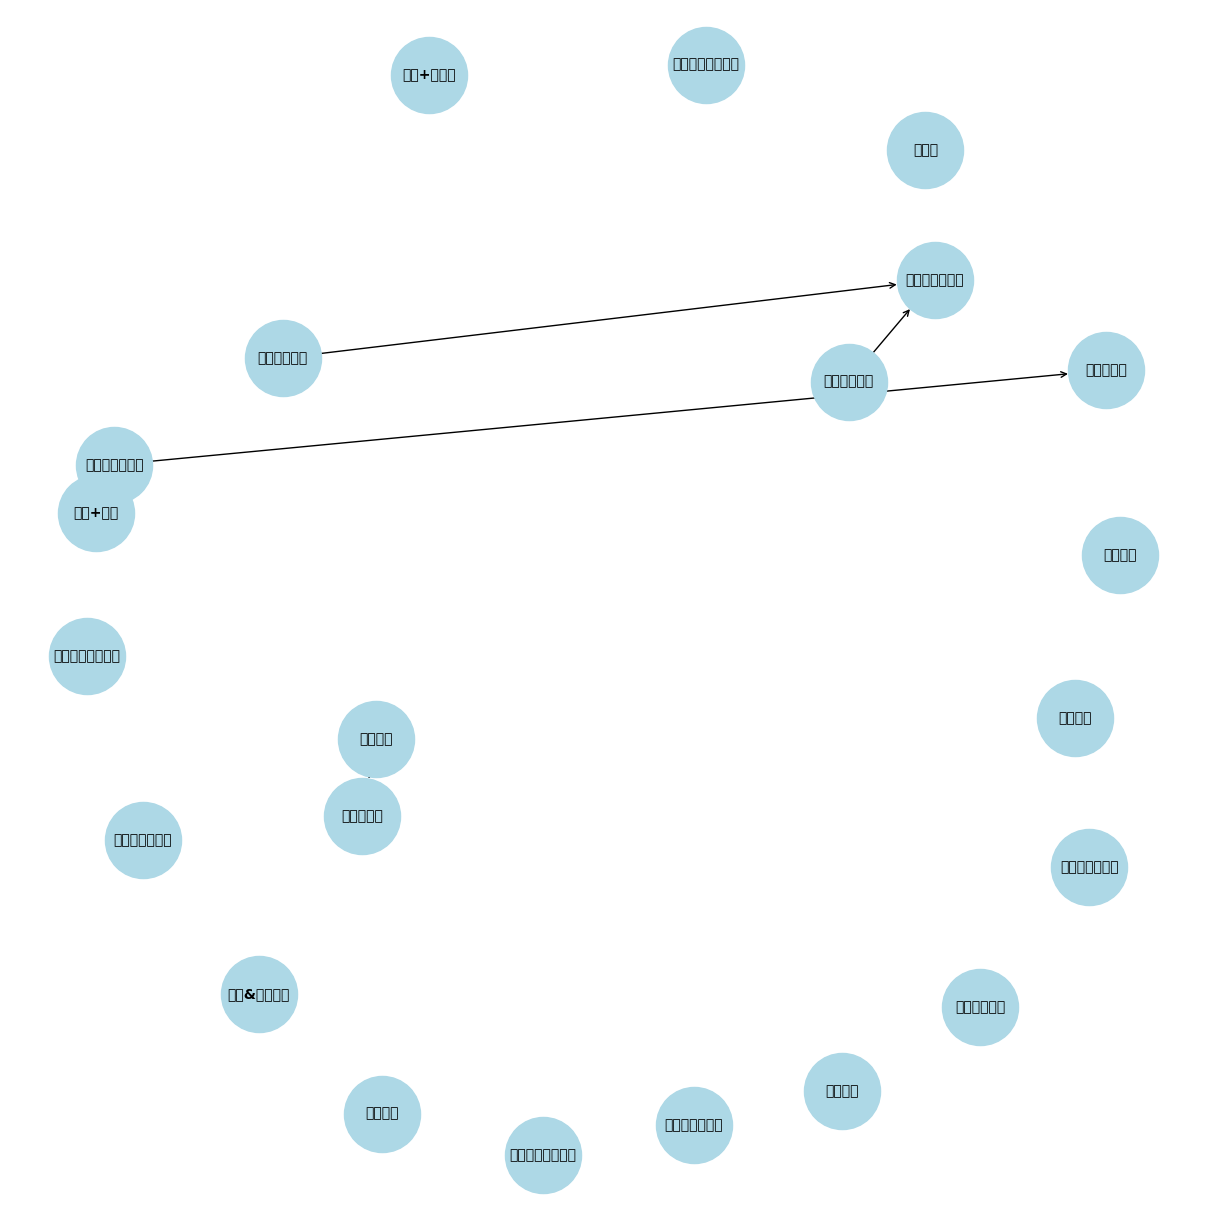

In [ ]:
adj_matrix = model.adjacency_matrix_
threshold = 0.29
filtered_matrix = np.where(np.abs(adj_matrix) > threshold, adj_matrix, 0)

# Optionally, you can visualize the filtered adjacency matrix
def plot_adjacency_matrix(matrix, labels):
    G = nx.DiGraph(matrix)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, labels={i: labels[i] for i in range(len(labels))}, 
            node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', 
            arrows=True, arrowstyle='->', arrowsize=10, edge_color='black')
    plt.show()

# If df_std is a DataFrame, use its columns as labels
if isinstance(df_std, pd.DataFrame):
    labels = df_std.columns
else:
    labels = range(len(filtered_matrix))

plot_adjacency_matrix(filtered_matrix, labels)

In [ ]:
%%time
# RCD
print(time.ctime())
model = lingam.RCD()
model.fit(df_std)
print(time.ctime())

# DAGを保存するなら実行
save_pickle = 'pickles'
os.makedirs(save_pickle, exist_ok=True)
#with open(save_pickle+'/model_RCD.pickle', mode='wb') as f:
#    pickle.dump(model, f)

Thu Jun 27 16:22:34 2024
Thu Jun 27 16:22:56 2024
CPU times: user 2min 5s, sys: 22.9 s, total: 2min 28s
Wall time: 22.1 s


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

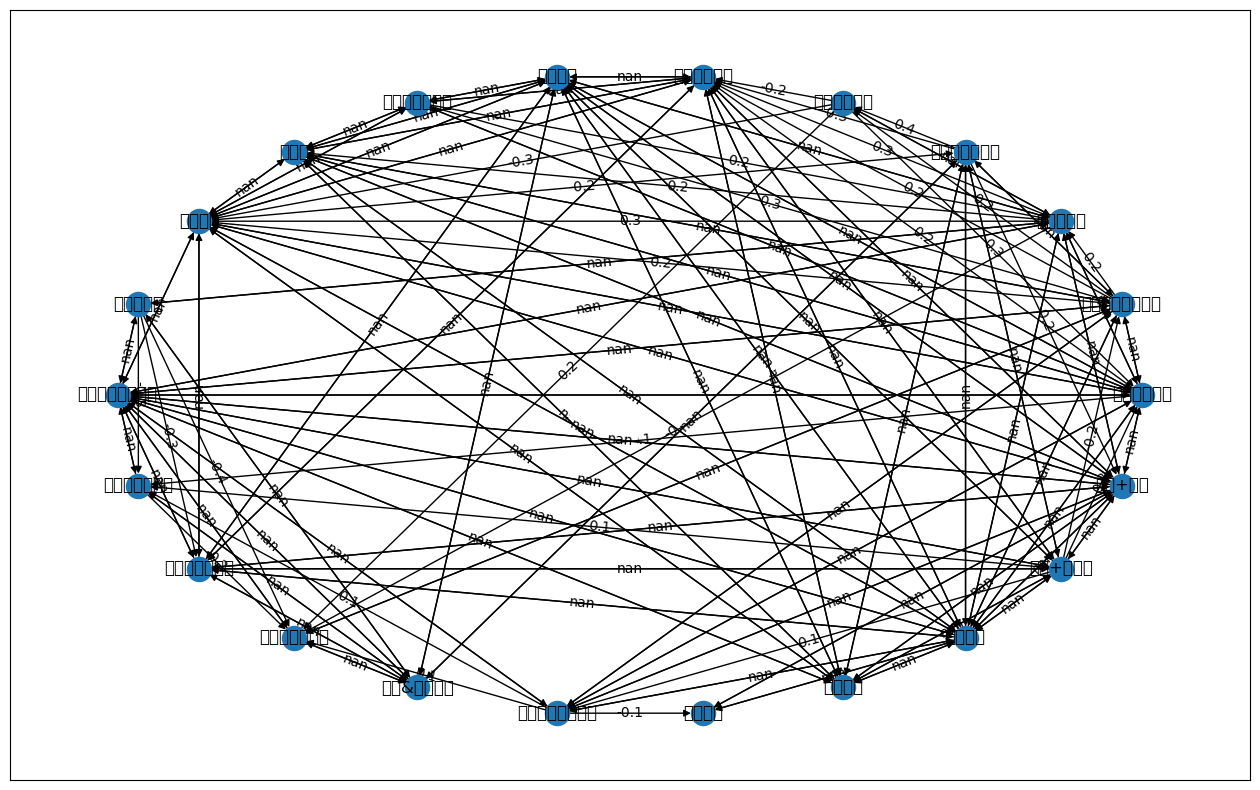

In [ ]:
# 隣接行列を有向グラフで可視化(networkx使用)
#print(model.causal_order_)
#print(np.array(colsname)[model.causal_order_])
#print(model.adjacency_matrix_)

adjacency_ = pd.DataFrame(model.adjacency_matrix_, columns=colsname, index=colsname)
G=nx.from_pandas_adjacency(adjacency_.T, create_using=nx.DiGraph)  # 列が原因、行が結果なのでnetworkxでは転置の必要がある
plt.figure(figsize=(16,10))
#pos = nx.bipartite_layout(G, colsname[:5])
#pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
edge_labels = edge_labels = dict([((u,v,), f"{d['weight']:.1f}") for u,v,d in G.edges(data=True)])#nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw_networkx(G, pos)
plt.grid(False)
plt.show()

# 隣接行列を有向グラフで可視化(make_dot使用)
#make_dot(model.adjacency_matrix_, labels=colsname)

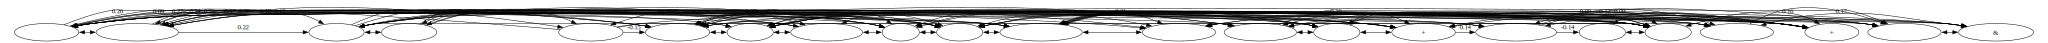

In [ ]:
# 隣接行列を有向グラフで可視化(make_dot使用)
make_dot(model.adjacency_matrix_, labels=list(colsname))